# 신경망의 사용처
- 분류 ; 보통 softmax 함수
- 회귀 ; 보통 항등함수
- 사용처에 따라 출력층에서 사용하는 활성화 함수가 달라진다.

In [51]:
# 항등 함수
# 입력값 -> 그대로 출력
def identity_function(x):
  return x

## softmax 함수
$\begin{align}
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}
\end{align}$
- $n$ : 출력층의 뉴런의 갯수
- $y_k$ : 출력층 뉴런의 k번째 출력

In [52]:
# softmax 함수 연습
import numpy as np

a = np.array([0.3, 2.9, 4.0])
# 입력값
exp_a = np.exp(a)
# 모든 입력값에 대해 지수함수(exp) 적용
print(a)
print(exp_a)

[0.3 2.9 4. ]
[ 1.34985881 18.17414537 54.59815003]


In [53]:
sum_exp_a = np.sum(exp_a)
# 분모가 될 모든 입력값에 대한 지수함수 합
print(sum_exp_a)

74.1221542101633


In [54]:
# 이제 softmax 함수값 계산
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [55]:
# 각 입력값에 대해 지수함수를 적용시킨 후
# softmax 공식에 대입하여
# softmax 값을 구함

# softmax는 뉴런이 2개 이상일 때 사용.
# 출력값 : 각각의 클래스일 확률.

np.sum(y)  # 확률의 총합은 1

1.0

In [56]:
# softmax를 함수로 저장하자
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

## softmax 함수의 문제점
- 지수함수를 사용하기 때문에 입력값이 조금만 커져도 출력값이 엄청나게 증가한다.
- log를 사용한다.
  - log는 복잡한 계산을 간단한 계산으로 바꿔준다.
  - log는 큰 수의 사이즈를 작게 줄여준다.
- $\begin{align}
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C\,exp(a_k)}{C\,\sum_{i=1}^n exp(a_i)} = \frac{exp(a_k+logC)}{\sum_{i=1}^n exp(a_i+logC)} = \frac{exp(a_k+C^\prime)}{\sum_{i=1}^n exp(a_i+C^\prime)} 
\end{align}$
- $C'$값은 보통 입력신호들 중 최댓값 사용 (오버플로를 막기 위해)

In [57]:
# softmax 함수에도 단점이 있다.
# 지수함수를 사용하므로 입력값이 약간만 커져도 지수적으로 엄청나게 증가한다.
# e^1000만 되도 무한대를 의미하는 np.inf를 만들어낸다.
# 또한 이렇게 큰 값으로 나눗셈을 하는 것 자체가 불안정하다.

# 이러한 지수함수를 활용하기 때문에 발생하는 문제점을 해결해줄 필요가 있다.
# log의 개념을 활용하면 손쉽게 해결이 가능하다.

# log는 복잡한 계산을 간단한 계산으로 바꿔준다.
# log는 큰 수의 사이즈를 작게 줄여준다.

In [58]:
# softmax 함수의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다.
# k번째 입력값 a_k에 더할 값인 c' 을 어떤 값으로 사용하던 상관없지만
# 오버플로를 막을 목적으로 입력 신호들 중 최댓값을 사용하는 것이 일반적이다.

In [59]:
# softmax 함수의 문제점 예시
import numpy as np
a = np.array([1010, 1000, 990])  # 입력값
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)  # 입력값을 softmax를 취한 결과

[nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [60]:
# 이렇게 1000 근처의 값들만 넣어도
# overflow라면서 계산하지 못하고
# [nan nan nan] 으로 제대로 출력하지 못하고 있다.

# 입력 특성의 최댓값을 C'으로 해서
# a-C'을 입력값으로 대신 사용해보자.

## softmax 함수의 특징
- 지수함수를 계산할 때 어떤 정수를 더하거나, 빼도 결과는 변하지 않는다.
- softmax 함수 결과값 : 배열
- 배열의 원소들 : 0~1 사이의 실수 (각 클래스일 확률)
- 원소들의 총 합 : 1
- 출력값 중 가장 큰 위치의 클래스로 분류가 된다.
- 입력값의 대소관계 = 출력값의 대소관계

In [61]:
# 입력값을 a 대신에 a-C'을 사용하도록 하자.
# C'은 보통 a값들의 최댓값을 사용한다.
c = np.max(a)
print(a-c)

[  0 -10 -20]


In [62]:
new_x = a - c
new_exp_x = np.exp(new_x)
sum_new_exp_x = np.sum(new_exp_x)
y = new_exp_x / sum_new_exp_x
print(y)  # 변화된 입력값을 softmax 함수 안에 넣은 결과값

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [63]:
# 이번에는 정상적으로 잘 구해졌다

In [64]:
# 이를 토대로 softmax 함수를 다시 정의하자.
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [65]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [66]:
print(np.sum(y))  # 확률의 총 합 : 1

1.0


In [67]:
# 위의 결과물을 분석해보자
# 출력값 : [0.01821127 0.24519181 0.73659691]

# 0번 클래스가 될 확률 : 1.8%
# 1번 클래스가 될 확률 : 24.5%
# 2번 클래스가 될 확률 : 74.7%

# 이렇게 확률적인 결론을 낼 수 있다.
# 즉, softmax 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것이다.

In [68]:
# 입력값의 대소관계 = 출력값의 대소관계. 변하지 않음.
# 지수함수가 단조함수이기 때문.

# 신경망을 이용한 분류에서
# 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식된다.

# 그런데 softmax 함수를 출력층의 함수로 사용하게 된다면
# 원래의 입력값의 대소관계를 알고 있기 때문에
# softmax 함수를 취한 후의 대소관계도 동일.
# 따라서 출력층의 활성화 함수를 softmax를 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 변화되지 않는다.
# 출력층의 softmax 함수를 생략해도 된다.

In [69]:
# 그렇다면 왜 굳이 softmax 함수를 배웠는가?

# 기계학습(머신러닝)의 문제 풀이는 학습과 추론. 두 단계를 거치기 때문이다.

# 학습 단계 - 모델 학습
# 추론 단계 - 학습한 모델로 미지의 데이터에 대해 추론(분류)

# 추론 단계에서는 softmax 함수를 생략하는 것이 일반적
# 단, 신경망을 학습시킬 때는 출력층에서 softmax를 사용

In [70]:
# 출력층의 뉴런의 갯수 : 분류문제에서 분류하고 싶은 클래스의 갯수
# ex) 0~9까지 숫자로 분류 -> 출력층 뉴런의 갯수 : 10개

In [71]:
# 손글씨 필기체 숫자 인식

# 추론(분류)하는 과정만 구현해보자.

# 순전파 : 앞에서 뒤로 순서대로 이동하며 추론하는 과정

## MNIST 손글씨 데이터셋
- 훈련 데이터셋 : 60000개
- 테스트 데이터셋 : 10000개
- 이미지 사이즈 : 28*28px(각 픽셀은 0~255까지의 값을 취함)
- 각 이미지당 label이 숫자로 붙어 있음

In [72]:
import sys, os
sys.path.append(os.pardir)
# 현재 디렉토리의 부모 디렉토리의 파일을 가지고 올 수 있도록 설정

In [73]:
# 디렉토리에 mnist.py 파일을 넣어서 가져올 수도 있지만
# tensorflow.keras의 datasets 안에서 mnist 데이터셋을 불러오자.

import tensorflow as tf
from tensorflow.keras import datasets

mnist = datasets.mnist

### dataset 로드

In [74]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 훈련 데이터셋 / 테스트 데이터셋 가져오기

### shape 확인

In [75]:
# shape 확인해보기
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [76]:
# 훈련 데이터셋의 갯수 : 60000개
# 테스트 데이터셋의 갯수 : 10000개

# 이미지 사이즈  : 28 * 28

# 채널의 수 : 1 (gray scale 이미지)

### 이미지 확인

In [77]:
# 이미지가 잘 불러와졌나 확인해보기
img = X_train[0]
print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [78]:
img.shape

(28, 28)

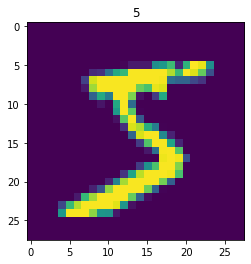

In [79]:
# 이미지 시각화
label = y_train[0]

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(label)
plt.show()

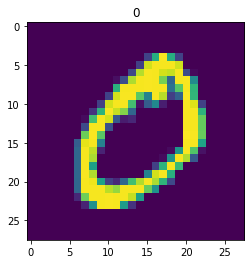

In [80]:
img1 = X_train[1]
label1 = y_train[1]

plt.imshow(img1)
plt.title(label1)
plt.show()

### MNIST 데이터셋 - 추론(분류) 신경망 구현

In [81]:
# 입력값 : 28*28 = 784 (각 픽셀 하나하나의 입력을 받음)
# 출력층 : 10개 (숫자 0~9로 분류)

# 은닉층 2개
# 1번째 은닉층 : 뉴런 50개
# 2번째 은닉층 : 뉴런 100개

In [ ]:
# MNIST 분류 신경망을 함수화 시켜서 만들어보자.

# 가중치, 절편이 들어있는 sample_weight.pki 파일을 불러오자.
# def init_network():
#   import pickle
#   with 